# 🔋 EV Charging Demand Forecasting - Mini Project

This project demonstrates how machine learning can be used to forecast EV (Electric Vehicle) charging demand. The aim is to support climate-tech companies by providing predictive analytics to improve grid coordination and energy efficiency.

**Problem**: Predict future EV charging load based on historical usage data.

**Use Case**: Help optimize grid stability and reinforce clean energy usage via smart EV coordination.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns


## 🔍 Simulated Dataset
Creating a synthetic dataset to simulate EV charging load (in kWh) over time.

In [2]:
# Generate simulated time-series EV charging data
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=180, freq='D')
base_load = 200 + np.random.normal(0, 10, size=180)
seasonal = 20 * np.sin(np.linspace(0, 3 * np.pi, 180))
trend = np.linspace(0, 30, 180)

data = pd.DataFrame({
    'Date': dates,
    'EV_Charging_kWh': base_load + seasonal + trend
})
data.set_index('Date', inplace=True)
data.head()

,EV_Charging_kWh
Date,
2024-01-01,204.967142
2024-01-02,199.837516
2024-01-03,208.914286
2024-01-04,218.879115
2024-01-05,202.509978


## 📊 Visualization

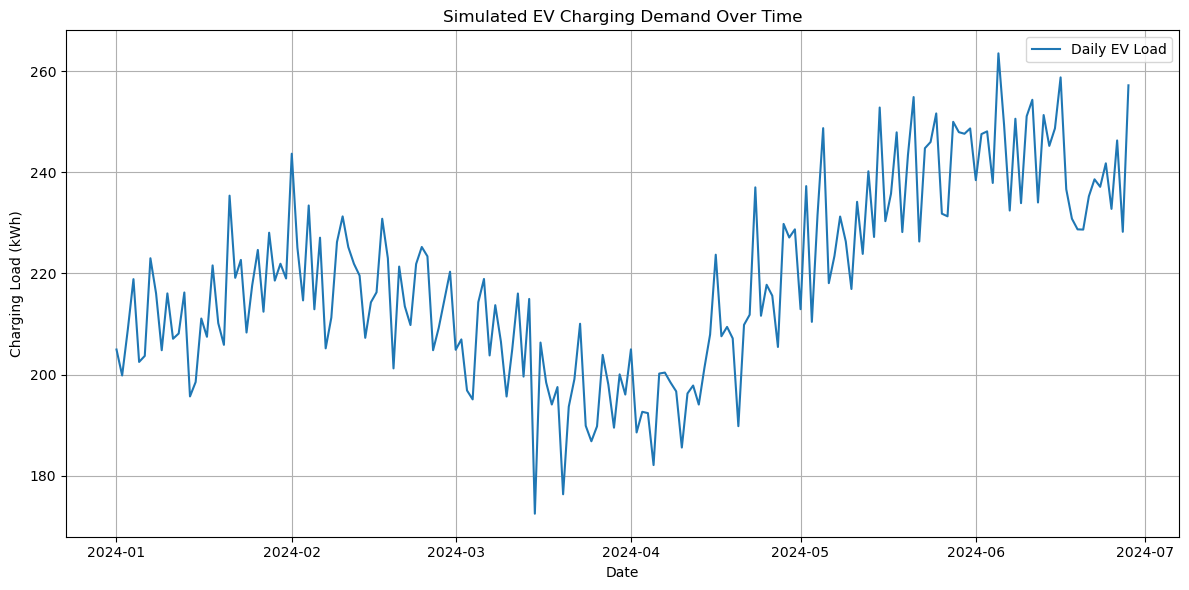

In [3]:
# Visualizing the EV charging demand
plt.figure(figsize=(12,6))
plt.plot(data.index, data['EV_Charging_kWh'], label='Daily EV Load')
plt.title('Simulated EV Charging Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Charging Load (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Forecasting Model
We'll use a simple linear regression model for future demand forecasting.

In [4]:
# Prepare data for model
data['Days'] = np.arange(len(data))
X = data[['Days']]
y = data['EV_Charging_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 25.82


D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


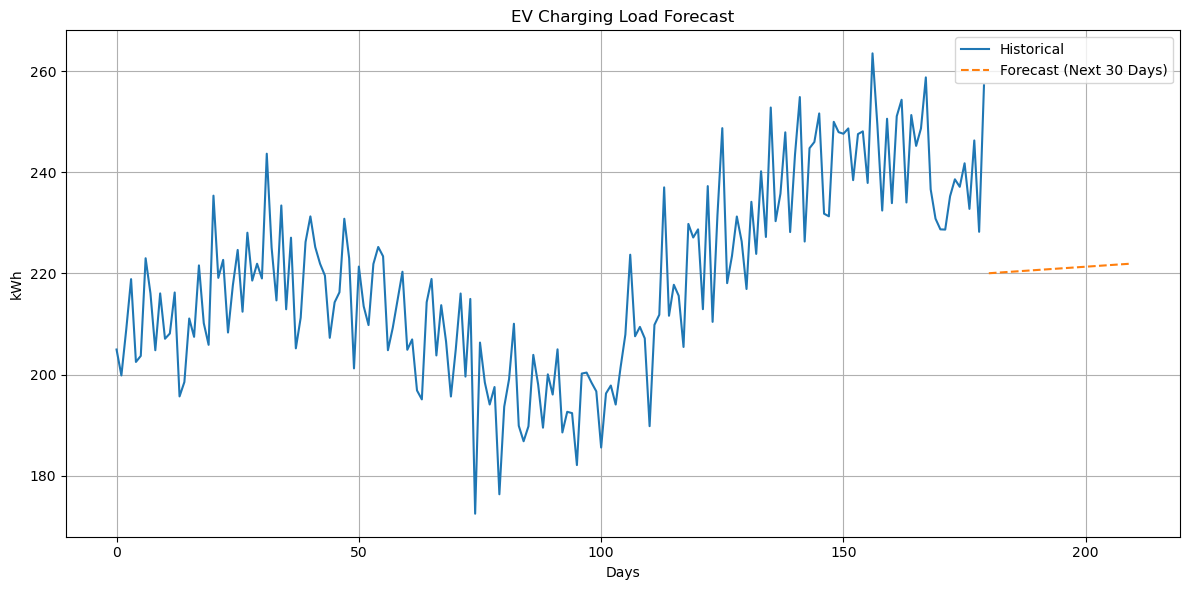

In [5]:
# Forecast next 30 days
future_days = np.arange(len(data), len(data)+30).reshape(-1,1)
future_preds = model.predict(future_days)

# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Days'], data['EV_Charging_kWh'], label='Historical')
plt.plot(future_days, future_preds, label='Forecast (Next 30 Days)', linestyle='--')
plt.title('EV Charging Load Forecast')
plt.xlabel('Days')
plt.ylabel('kWh')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 Conclusion

This mini-project demonstrates how machine learning can be used to forecast EV charging demand based on historical data. By predicting future demand patterns, we can enable companies to:

- Optimize battery storage and energy dispatch.
- Coordinate millions of EVs as a large distributed battery system.
- Reduce peak load and CO₂ emissions by smartly shifting charging times.
- Improve grid reliability and stability using AI-powered insights.

This approach helps align EV behavior with grid needs, unlocking both financial and environmental value.

🔗 This notebook is a small sample of how intelligent forecasting models can drive value for climate-tech startups.
